In [3]:
import sqlite3

# createthe SQLite database file
#'sales_data.db' is the name of the file to be created.
conn = sqlite3.connect("sales_data.db")
c = conn.cursor()
print("Database 'sales_data.db' connected successfully.")

Database 'sales_data.db' connected successfully.


In [2]:
# Create the sales table with columns for product, quantity, and price.
c.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')
print("Table 'sales' created or already exists.")

Table 'sales' created or already exists.


In [3]:
# Sample data: (product, quantity, price)
sample_data = [
    ('Laptop', 2, 1200.00),
    ('Monitor', 5, 300.00),
    ('Laptop', 3, 1200.00),
    ('Keyboard', 10, 75.00),
    ('Monitor', 1, 300.00)
]

# Insert the data into the sales table
c.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Save the changes (commit) and close the initial connection
conn.commit()
conn.close()
print("Sample data inserted and connection closed.")

Sample data inserted and connection closed.


In [4]:
# Drop the old table to ensure a clean start
c.execute("DROP TABLE IF EXISTS sales")

# Create the sales table
c.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')
print("Table 'sales' reset and ready.")

Table 'sales' reset and ready.


In [5]:
# New sample data with 12 rows: (product, quantity, price)
sample_data = [
    ('Laptop', 2, 1200.00),
    ('Monitor', 5, 300.00),
    ('Laptop', 3, 1200.00),
    ('Keyboard', 10, 75.00),
    ('Monitor', 1, 300.00),
    ('Mouse', 15, 25.00),        # New Data
    ('Keyboard', 5, 75.00),       # New Data
    ('Laptop', 1, 1200.00),      # New Data
    ('Mouse', 8, 25.00),         # New Data
    ('Monitor', 4, 300.00),       # New Data
    ('Webcam', 7, 50.00),        # New Product
    ('Webcam', 2, 50.00)         # New Data
]

# Insert the new data
c.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Save the changes (commit) and close the connection
conn.commit()
conn.close()
print(f"**Successfully inserted {len(sample_data)} records and connection closed.**")

**Successfully inserted 12 records and connection closed.**


In [6]:
import pandas as pd
import sqlite3
# Reconnect to the database file
conn = sqlite3.connect("sales_data.db")

# The SQL query remains the same, it will now process all 12 rows
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM
    sales
GROUP BY
    product
"""
df = pd.read_sql_query(query, conn)
conn.close()

print("\n--- Sales Summary Table (Updated) ---")
print(df)


--- Sales Summary Table (Updated) ---
    product  total_qty  revenue
0  Keyboard         15   1125.0
1    Laptop          6   7200.0
2   Monitor         10   3000.0
3     Mouse         23    575.0
4    Webcam          9    450.0


Chart created and saved as sales_chart.png.


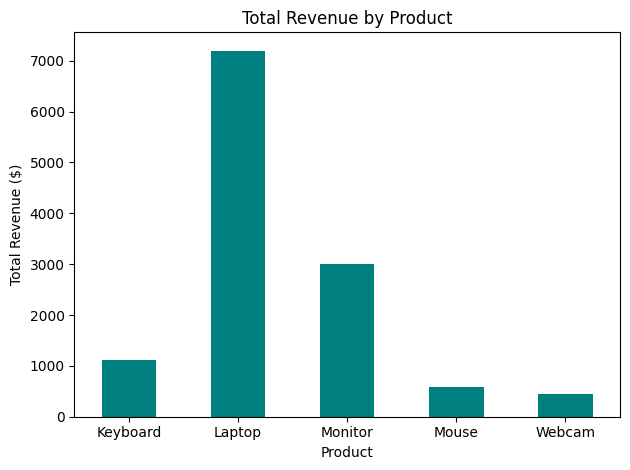

In [8]:
import matplotlib.pyplot as plt

# 1. Plot the chart (creates the figure in memory)
df.plot(
    kind='bar',
    x='product',
    y='revenue',
    title='Total Revenue by Product',
    legend=False,
    color='teal'
)

# Add labels and format the plot
plt.ylabel('Total Revenue ($)')
plt.xlabel('Product')
plt.xticks(rotation=0)
plt.tight_layout()

# 2. SAVE the chart to the file first!
plt.savefig("sales_chart.png")
print("Chart created and saved as sales_chart.png.")

# 3. Then, display the chart (optional, but good for verification)
plt.show()